# A visualization of an astrophysical simulation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Read in the density file.

In [2]:
fname = "density_projection.dat"
d = np.fromfile(fname, dtype = np.float32)
d = np.reshape(d, (512,512))

### Repeat for the energy file.

In [8]:
fname = "energy_projection.dat"
energy = np.fromfile(fname, dtype = np.float32)
energy = np.reshape(energy, (512,512))

### Let's plot using the default color map.

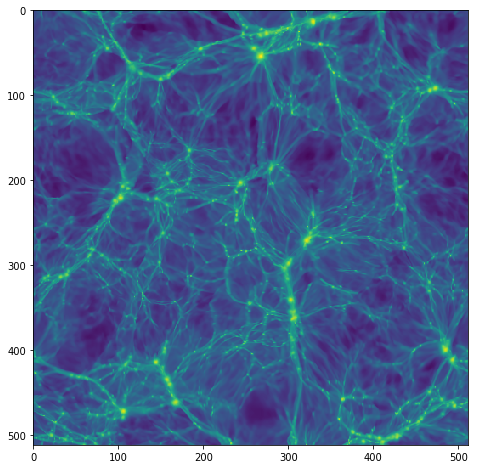

In [9]:
d_log = np.log10(d)
f = plt.figure(figsize = (8,8))
plt.imshow(d_log)

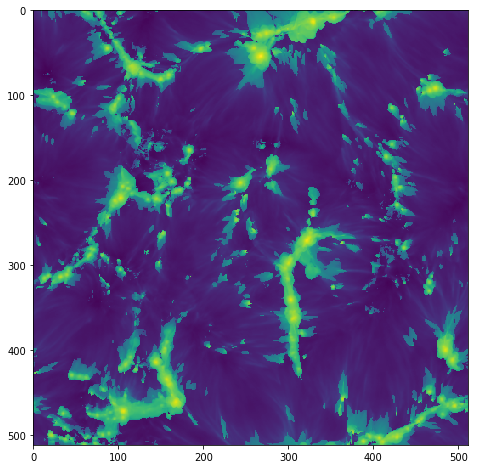

In [10]:
e_log = np.log10(energy)
f = plt.figure(figsize = (8,8))
plt.imshow(e_log)

### Make a 3-color image in HSV color space.
Hue = [0,1], Saturation = [0,1], Value = [0,1]
We will map density to V and S, and energy to H.

In [11]:
d_min = d_log.min()
d_max = d_log.max()

v = (d_log - d_min)/(d_max - d_min)  #normalization
s = 1.0 - v

In [85]:
e_min = e_log.min()
e_max = e_log.max()

#0 is red, so we begin with red
#h = 0.8 - 0.2*(e_log - e_min)/(e_max - e_min)
#h = 0. + 0.18*(e_log - e_min)/(e_max - e_min)
h = .7 - 0.38*(e_log - e_min)/(e_max - e_min)

### Now we have to make a HSV image, and then convert to RGB.

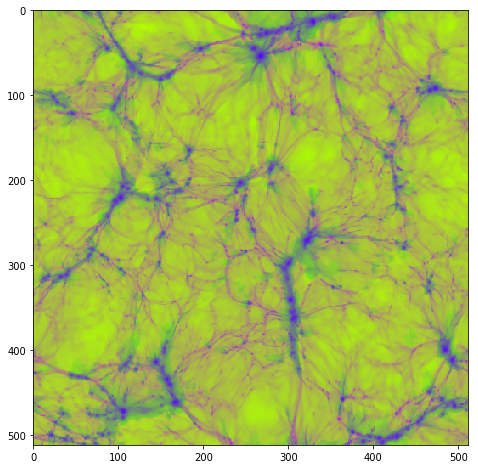

In [86]:
hsv_image = np.zeros((512,512,3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_image = colors.hsv_to_rgb(hsv_image)

f = plt.figure(figsize = (8,8))
plt.imshow(hsv_image)
#plt.imsave("hsv_test.png", hsv_image)

### Now let's see the 3-color image.

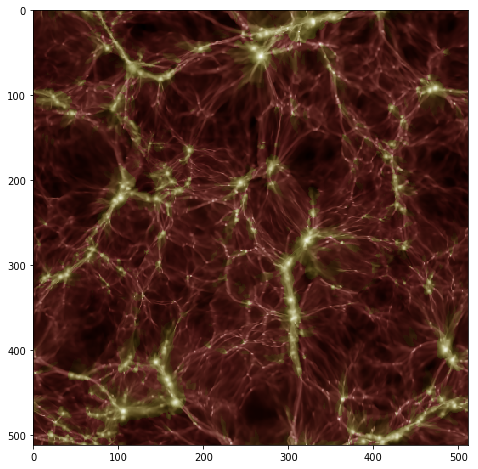

In [84]:
f = plt.figure(figsize = (8,8))
plt.imshow(rgb_image)
plt.imsave("test1.png", rgb_image)